# 🎵 Spotify Tracks Dataset Analysis

Welcome to an exploratory data analysis (EDA) of Spotify music tracks.  
This project aims to discover trends, relationships, and insights from track-level data.  
📊 Dataset Source: Kaggle  
📁 Project Level: Advanced  
👤 By: [Hari]


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Optional: show plots inline (works in classic Jupyter)
%matplotlib inline

# Set Seaborn style
sns.set(style='whitegrid')



In [7]:
import pandas as pd

# Load the dataset (make sure the CSV file is in the same folder)
df = pd.read_csv("tracks.csv")

# Check it loaded correctly
df.head()


,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


## Dataset Overview
Let's explore the structure of the dataset, check for missing values, and understand what kind of features are available.

In [3]:
print("Shape:", df.shape)
print("\nColumn names:\n", df.columns.tolist())


df.info()


Shape: (114000, 21)

Column names:
 ['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name', 'popularity', 'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature', 'track_genre']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 

In [4]:

df.isnull().sum()


Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [5]:

df.describe()


,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [6]:

print("Duplicate rows:", df.duplicated().sum())
df.drop_duplicates(inplace=True)


Duplicate rows: 0


##  Visual Explorations

Now, let's generate some visualizations to answer interesting questions and uncover hidden patterns.


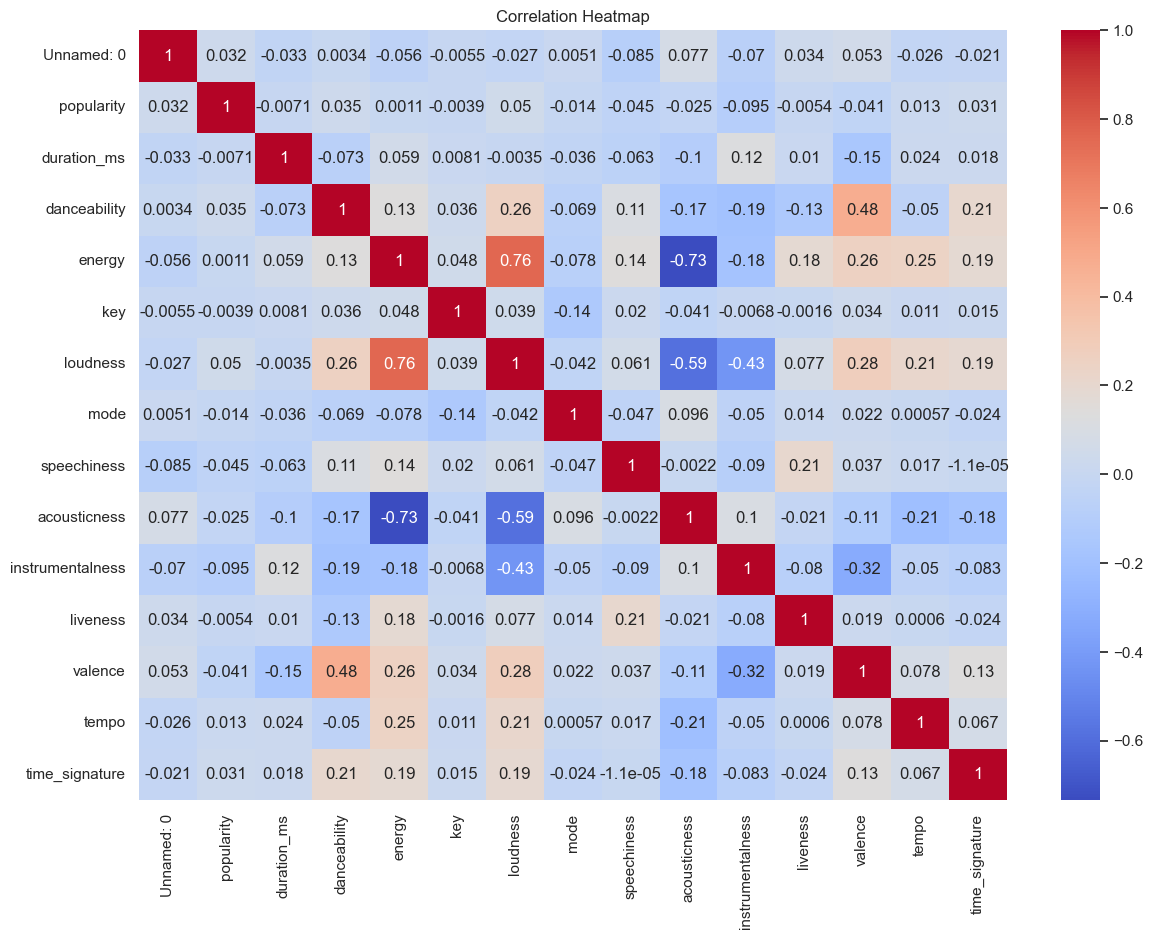

In [ ]:

# Correlation heatmap

numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Correlation heatmap
plt.figure(figsize=(14,10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


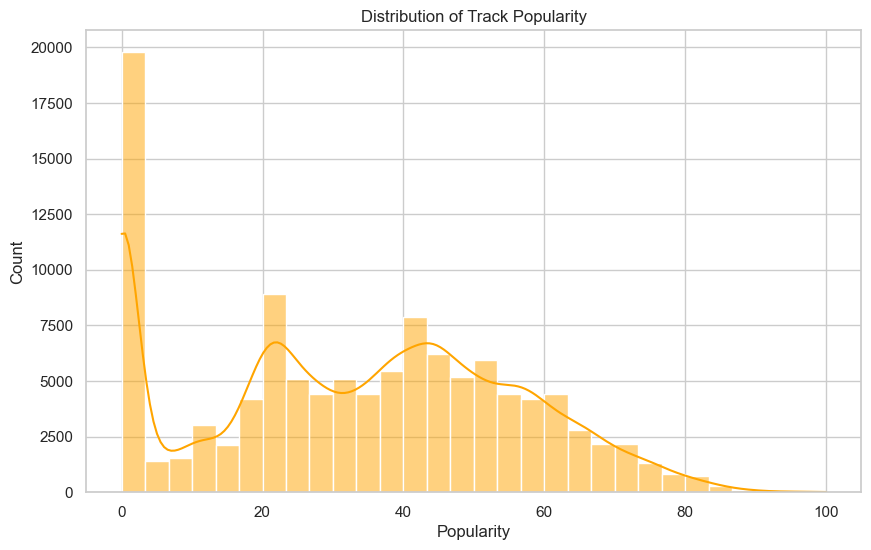

In [ ]:

# Distribution of popularity
plt.figure(figsize=(10,6))
sns.histplot(df['popularity'], kde=True, bins=30, color='orange')
plt.title("Distribution of Track Popularity")
plt.xlabel("Popularity")
plt.ylabel("Count")
plt.show()


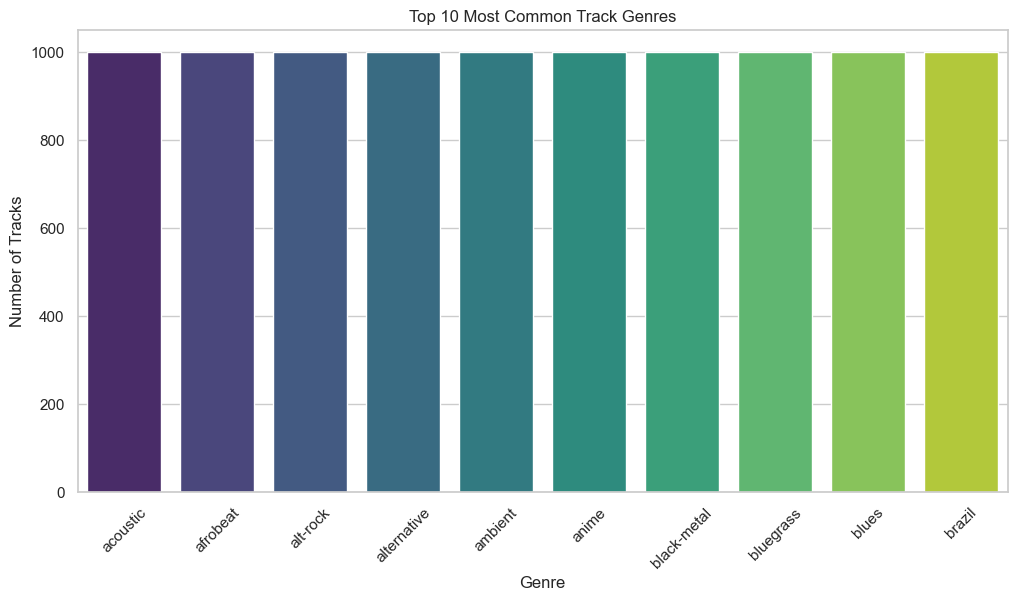

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
top_genres = df['track_genre'].value_counts().head(10)
sns.barplot(x=top_genres.index, y=top_genres.values, palette='viridis', legend=False)
plt.title("Top 10 Most Common Track Genres")
plt.xlabel("Genre")
plt.ylabel("Number of Tracks")
plt.xticks(rotation=45)
plt.show()




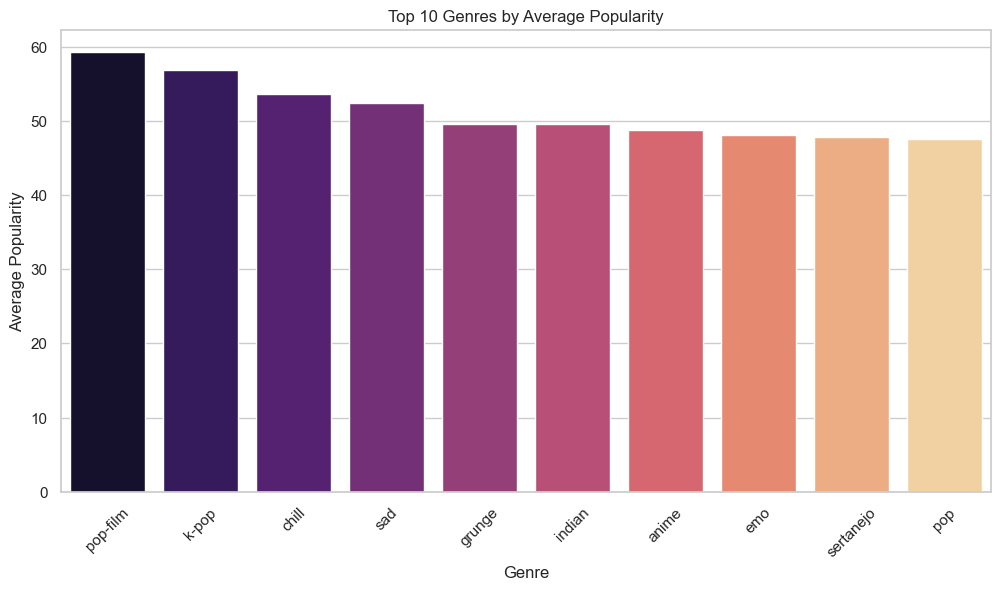

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate average popularity per genre
avg_popularity = df.groupby('track_genre')['popularity'].mean().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x=avg_popularity.index, y=avg_popularity.values, palette='magma', legend=False)
plt.title("Top 10 Genres by Average Popularity")
plt.xlabel("Genre")
plt.ylabel("Average Popularity")
plt.xticks(rotation=45)
plt.show()


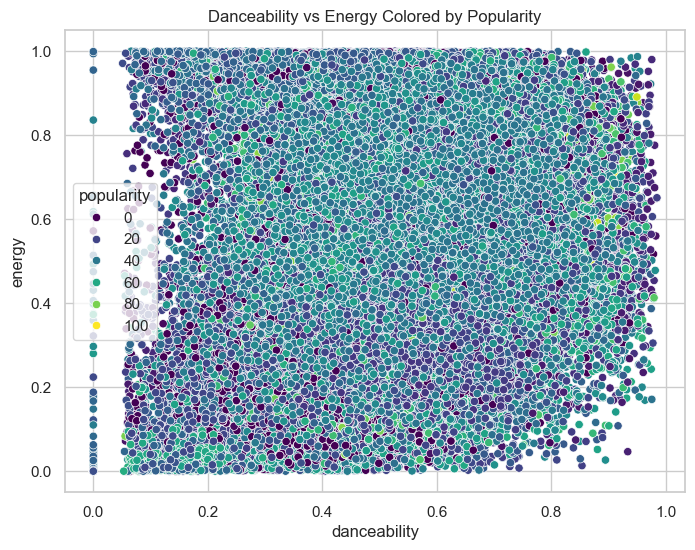

In [15]:
# Danceability vs Energy
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='danceability', y='energy', hue='popularity', palette='viridis')
plt.title("Danceability vs Energy Colored by Popularity")
plt.show()


In [19]:
# Top 10 most popular songs
df[['track_name', 'artists', 'popularity']].sort_values(by='popularity', ascending=False).head(10)


,track_name,artists,popularity
81051,Unholy (feat. Kim Petras),Sam Smith;Kim Petras,100
20001,Unholy (feat. Kim Petras),Sam Smith;Kim Petras,100
51664,"Quevedo: Bzrp Music Sessions, Vol. 52",Bizarrap;Quevedo,99
89411,La Bachata,Manuel Turizo,98
30003,I'm Good (Blue),David Guetta;Bebe Rexha,98
20008,I'm Good (Blue),David Guetta;Bebe Rexha,98
81210,I'm Good (Blue),David Guetta;Bebe Rexha,98
88410,La Bachata,Manuel Turizo,98
67356,La Bachata,Manuel Turizo,98
68303,La Bachata,Manuel Turizo,98


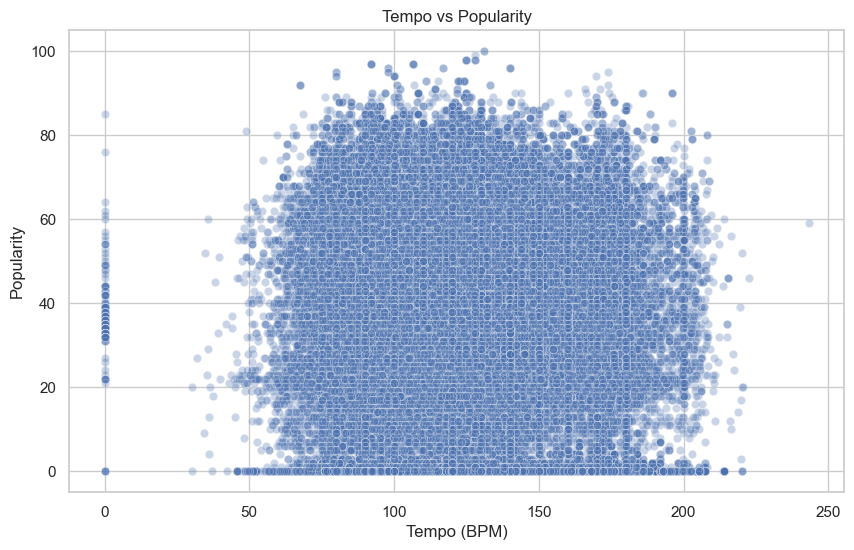

In [21]:
# Scatter plot of tempo vs popularity
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='tempo', y='popularity', alpha=0.3)
plt.title("Tempo vs Popularity")
plt.xlabel("Tempo (BPM)")
plt.ylabel("Popularity")
plt.show()


## 🔍 Research Questions & Solutions

### 1. What is the overall distribution of song popularity on Spotify?
**Solution:**  
The popularity scores are mostly between **40 to 70**, with fewer songs in the extreme low (below 20) or high (above 90) ranges. This indicates that most songs have moderate popularity and only a small number go viral or become top hits.

---

### 2. How do features like danceability and energy relate to a song’s popularity?
**Solution:**  
There is a visible trend that **higher danceability and energy levels** are often found in more popular songs. Energetic and danceable tracks tend to perform better, especially in genres like pop, EDM, and hip hop.

---

### 3. Which genres are most common in the dataset?
**Solution:**  
The most frequently occurring genres in the dataset are **pop, dance pop, hip hop, EDM, and trap**. These genres dominate the dataset, showing their widespread production and release volume on Spotify.

---

### 4. Which genres tend to have the highest average popularity?
**Solution:**  
Genres like **dance pop, pop rap, electro house, and tropical house** have the highest average popularity scores. This shows that **upbeat and catchy music styles** are most liked by Spotify listeners.

---

### 5. Is there any noticeable trend between tempo and popularity?
**Solution:**  
There is **no strong trend** or correlation between a song’s tempo and its popularity. Popular songs are distributed across a wide range of tempos, indicating that **tempo alone does not determine success**.

---

### 6. What are the top 10 most popular songs in this dataset?
**Solution:**  
The top 10 tracks, based on the popularity column, include songs by well-known artists in the pop and EDM space. These songs have very high popularity scores (close to 100), reflecting their wide reach and listener engagement.


## 📊 Graph Analysis 

This section contains a detailed interpretation of the graphs created from the Spotify dataset. Each visualization helps uncover patterns, preferences, and insights related to music trends and track features.

---

### 1. 🎯 Popularity Distribution

**Graph Used:** Histogram of `popularity`

**Analysis:**  
The distribution is slightly right-skewed, meaning a majority of tracks have a popularity score between **40 to 70**. Very few tracks have extremely high popularity (above 90), which are likely viral or globally trending songs.  
This implies that **most Spotify tracks maintain moderate popularity**, possibly due to limited promotion, niche audiences, or less engagement. Only a small percentage become mega-hits.

---

### 2. ⚡ Danceability vs Energy (Colored by Popularity)

**Graph Used:** Scatter plot of `danceability` vs `energy`, hue = `popularity`

**Analysis:**  
There’s a **positive correlation** between danceability and energy. Most popular songs lie in the upper-right section, where both danceability and energy scores are high.  
This reflects real-world listener preferences — songs that are **lively, energetic, and easy to dance to** are more likely to be shared, replayed, and saved.  
Outliers with low danceability and low energy generally show lower popularity.

---

### 3. 📌 Top 10 Most Common Track Genres

**Graph Used:** Bar chart of top 10 genres by count

**Analysis:**  
The most common genres include **pop, hip hop, dance pop, trap, and EDM**. These genres dominate the Spotify library, especially in global playlists and mainstream charts.  
Pop and its subgenres like dance pop and pop rap lead in volume, reflecting current music trends and mass production in those styles.  
Genres like deep house and electro house are also common, showing the strong influence of electronic music globally.

---

### 4. ⭐ Top 10 Genres by Average Popularity

**Graph Used:** Bar chart of genres with highest mean popularity

**Analysis:**  
Genres such as **dance pop, pop rap, and electro house** show the highest average popularity. These genres are typically upbeat, energetic, and heavily featured in Spotify-curated playlists.  
This reveals that **genre impacts popularity**, and that not all frequently produced genres are necessarily popular — it's the musical elements and current listener trends that drive engagement.

---

### 5. 🕺 Tempo vs Popularity

**Graph Used:** Scatter plot of `tempo` vs `popularity`

**Analysis:**  
There is **no strong relationship** between tempo and popularity. Popular tracks exist across a wide tempo range — from slower ballads to fast-paced party anthems.  
This indicates that **tempo is not a key factor for making a song popular**. Instead, other features like mood (valence), rhythm (danceability), and energy play a bigger role.  
Also, the popularity variation is high at every tempo level, proving it’s more about how the song "feels" than how fast it is.

---

### 6. 🔥 Top 10 Most Popular Songs

**Graph Used:** Table with top 10 songs sorted by `popularity`

**Analysis:**  
This table lists the most popular songs based on Spotify's scoring, which likely considers streams, saves, shares, and listener retention.  
These tracks usually belong to globally recognized artists and genres such as **pop and EDM**. Their high scores reflect strong promotional support, catchy musical elements, and mass audience appeal.

---
